In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
df1 = pd.read_csv('../Dados/CNN_Features/cnn_VGG16_256_max.csv')
df2 = pd.read_csv('../Dados/CNN_Features/cnn_VGG16_256_avg.csv')
df3 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_128_max.csv')
df4 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_256_max.csv')
df5 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_128_avg.csv')
df6 = pd.read_csv('../Dados/CNN_Features/cnn_VGG19_256_avg.csv')
df7 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_max.csv')
df8 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG16_256_avg.csv')
df9 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_max.csv')
df10 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_256_max.csv')
df11 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_128_avg.csv')
df12 = pd.read_csv('../Dados/PCA_Features/PCA_cnn_VGG19_256_avg.csv')

def preparation_holdout(dataframe):
    df_features = dataframe.iloc[:, :-1]
    df_classe = dataframe['classe']

    return df_features, df_classe;

X1, y1 = preparation_holdout(df1)
X2, y2 = preparation_holdout(df2)
X3, y3 = preparation_holdout(df3)
X4, y4 = preparation_holdout(df4)
X5, y5 = preparation_holdout(df5)
X6, y6 = preparation_holdout(df6)
X7, y7 = preparation_holdout(df7)
X8, y8 = preparation_holdout(df8)
X9, y9 = preparation_holdout(df9)
X10, y10 = preparation_holdout(df10)
X11, y11 = preparation_holdout(df11)
X12, y12 = preparation_holdout(df12)

In [4]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,shuffle=True, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,shuffle=True, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,shuffle=True, random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,shuffle=True, random_state=1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,shuffle=True, random_state=1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3,shuffle=True, random_state=1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3,shuffle=True, random_state=1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3,shuffle=True, random_state=1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3,shuffle=True, random_state=1)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10 , y10, test_size=0.3,shuffle=True, random_state=1)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.3,shuffle=True, random_state=1)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y12, test_size=0.3,shuffle=True, random_state=1)

In [14]:
## Aplicando Redes Neurais
clf1 = MLPClassifier(hidden_layer_sizes=(258,), activation ='logistic',learning_rate_init = 0.001, random_state=1, max_iter = 100)
clf2 = MLPClassifier(hidden_layer_sizes=(258,), activation ='logistic',learning_rate_init = 0.001, random_state=1, max_iter = 8000)
clf3 = MLPClassifier(hidden_layer_sizes=(258,), activation ='logistic',learning_rate_init = 0.001, random_state=1, max_iter = 10000)


mlp_classify = [clf1, clf2, clf3]

In [6]:
def aplicar_MLP_holdout(X_train, X_test, y_train, y_test, mlp):
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        acuracia = metrics.accuracy_score(y_test, y_pred)
        print(f'Metrica: {mlp}  | Accuracy: %.5f' % acuracia)

        print(confusion_matrix(y_test, y_pred))

def aplicar_MLP_kfold(X, y, mlp, k_fold=10):
    kf = KFold(n_splits=k_fold, random_state=1, shuffle=True)  # K-Fold com shuffle
    
    # Avaliando com cross_val_score
    scores = cross_val_score(mlp, X, y, scoring='accuracy', cv=kf)
    print(f'\nAccuracy (média): {scores.mean():.5f} (Desvio: {scores.std():.5f})')

    # Predições de validação cruzada (útil se quiser matriz de confusão geral)
    y_pred = cross_val_predict(mlp, X, y, cv=kf)
    print("Matriz de confusão geral (cross_val_predict):")
    print(confusion_matrix(y, y_pred))


In [7]:
datasets = [
    ('cnn_VGG16_256_max', X1_train, X1_test, y1_train, y1_test),
    ('cnn_VGG16_256_avg', X2_train, X2_test, y2_train, y2_test),
    ('cnn_VGG19_128_max', X3_train, X3_test, y3_train, y3_test),
    ('cnn_VGG19_256_max', X4_train, X4_test, y4_train, y4_test),
    ('cnn_VGG19_128_avg', X5_train, X5_test, y5_train, y5_test),
    ('cnn_VGG19_256_avg', X6_train, X6_test, y6_train, y6_test),
    ('PCA_cnn_VGG16_256_max', X7_train, X7_test, y7_train, y7_test),
    ('PCA_cnn_VGG16_256_avg', X8_train, X8_test, y8_train, y8_test),
    ('PCA_cnn_VGG19_128_max', X9_train, X9_test, y9_train, y9_test),
    ('PCA_cnn_VGG19_256_max', X10_train, X10_test, y10_train, y10_test),
    ('PCA_cnn_VGG19_128_avg', X11_train, X11_test, y11_train, y11_test),
    ('PCA_cnn_VGG19_256_avg', X12_train, X12_test, y12_train, y12_test),
]


--------------------- cnn_VGG16_256_max ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916


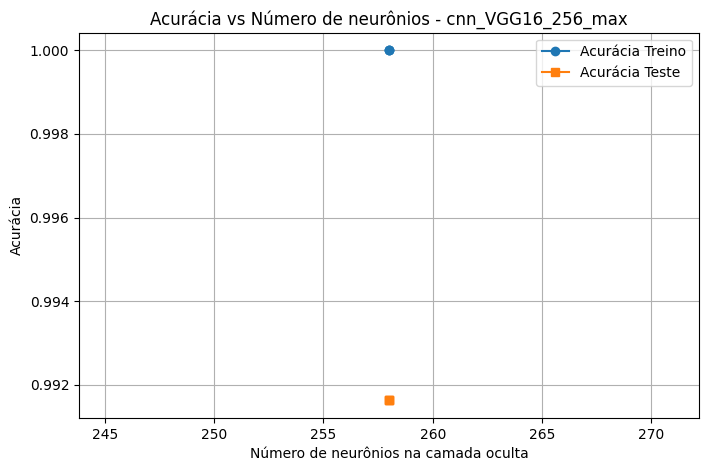


--------------------- cnn_VGG16_256_avg ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916


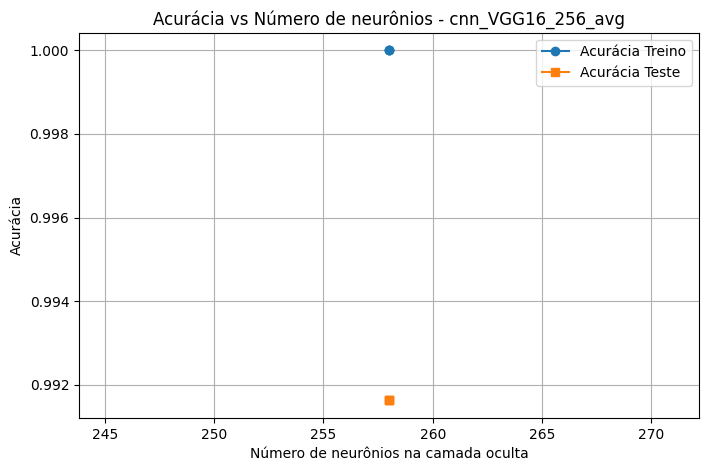


--------------------- cnn_VGG19_128_max ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9665
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9665
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9665


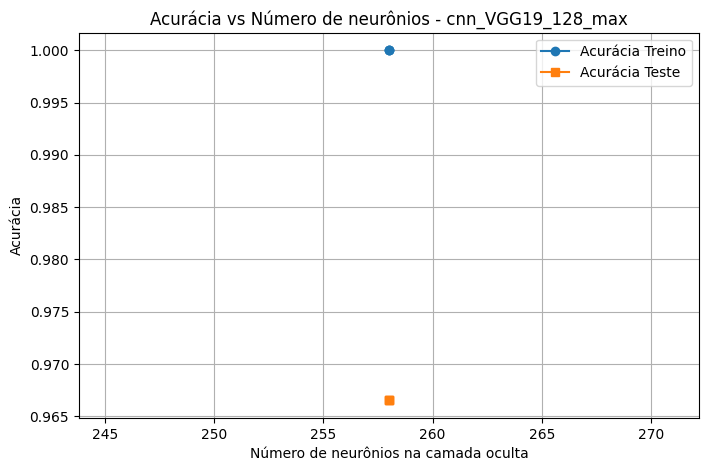


--------------------- cnn_VGG19_256_max ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916


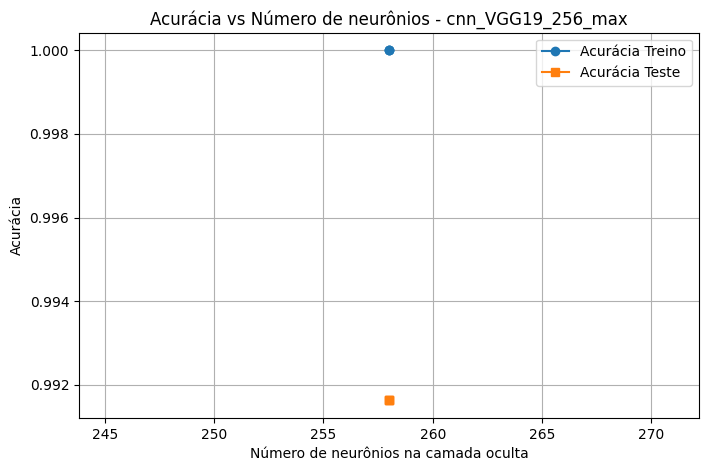


--------------------- cnn_VGG19_128_avg ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9498
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9498
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9498


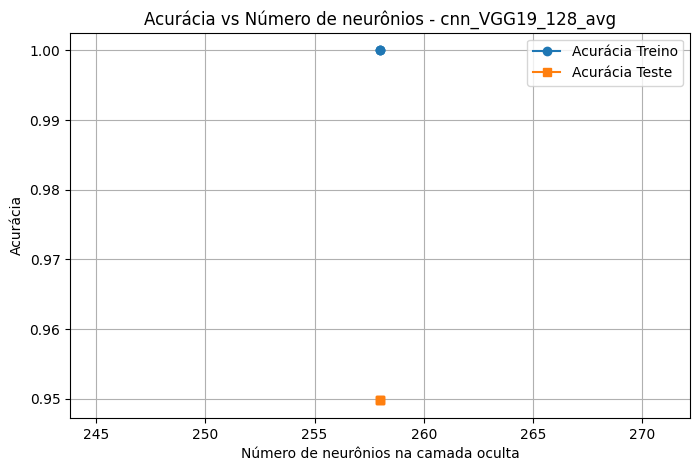


--------------------- cnn_VGG19_256_avg ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9958
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9958
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9958


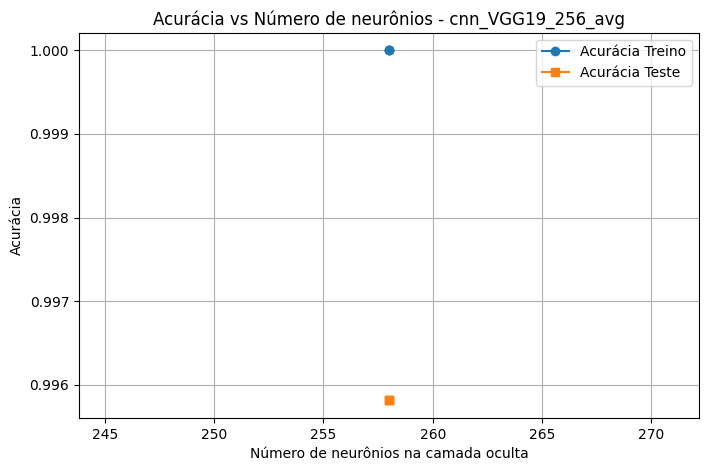


--------------------- PCA_cnn_VGG16_256_max ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9958
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9958
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9958


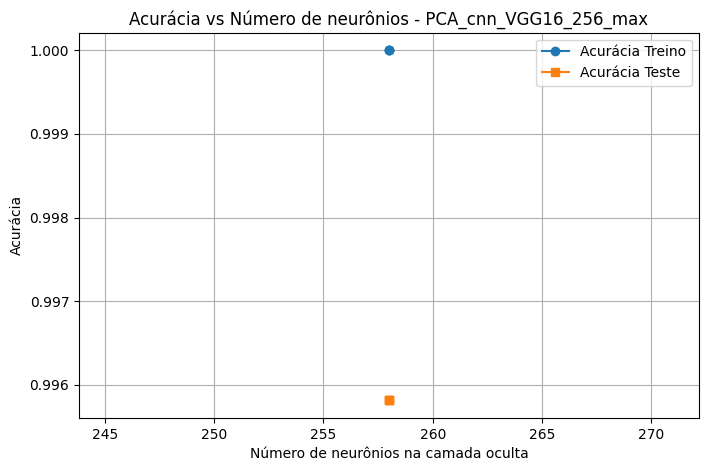


--------------------- PCA_cnn_VGG16_256_avg ---------------------


C:\Users\lf060\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9916


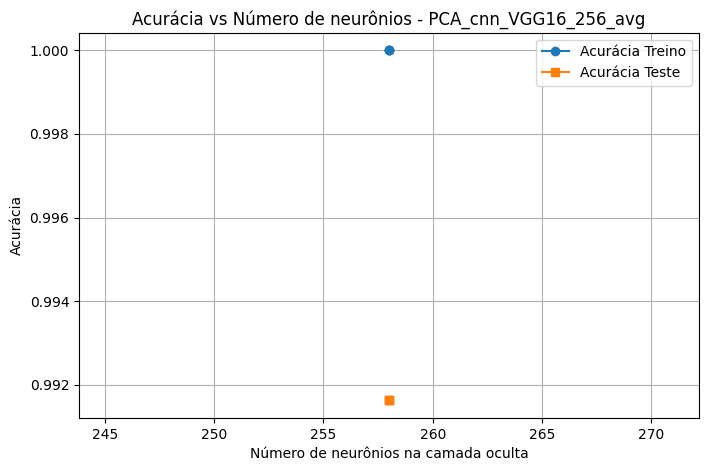


--------------------- PCA_cnn_VGG19_128_max ---------------------


C:\Users\lf060\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Nº neurônios: 258 | Acurácia Treino: 0.9982 | Acurácia Teste: 0.9205
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9247
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9247


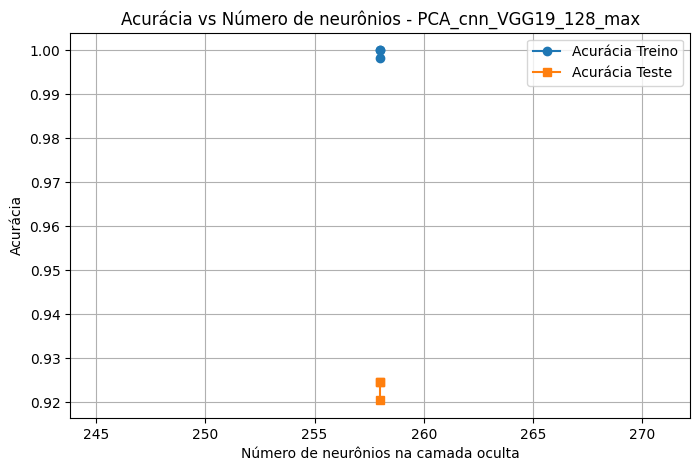


--------------------- PCA_cnn_VGG19_256_max ---------------------
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9874
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9874
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9874


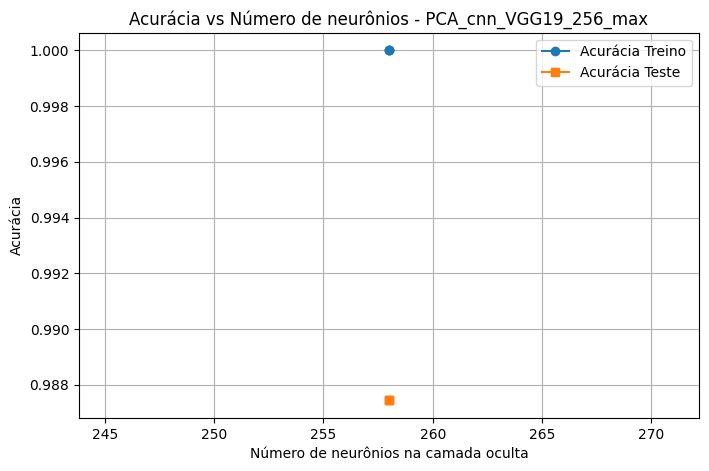


--------------------- PCA_cnn_VGG19_128_avg ---------------------


C:\Users\lf060\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Nº neurônios: 258 | Acurácia Treino: 0.9982 | Acurácia Teste: 0.9498
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9456
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9456


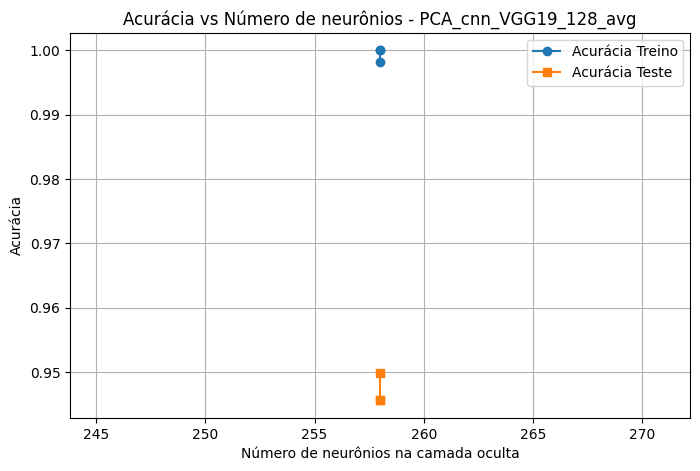


--------------------- PCA_cnn_VGG19_256_avg ---------------------


C:\Users\lf060\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9833
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9833
Nº neurônios: 258 | Acurácia Treino: 1.0000 | Acurácia Teste: 0.9833


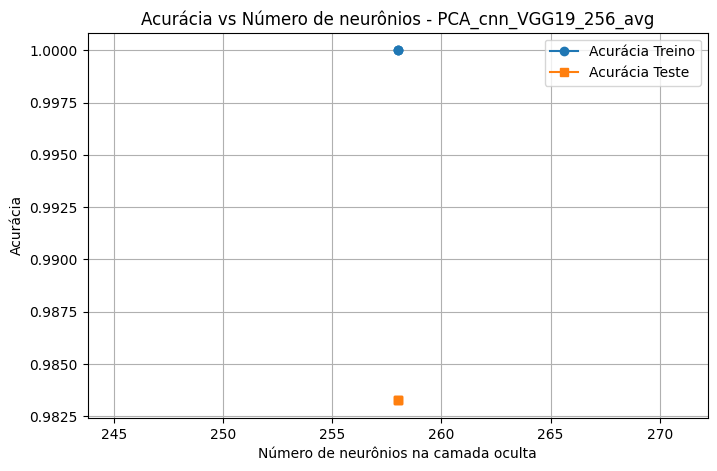

In [15]:
import matplotlib.pyplot as plt

# Supondo que datasets seja uma lista de tuplas assim:
# datasets = [(nome_base, X_train, X_test, y_train, y_test), ...]

# Lista de neurônios para correspondência com os clf
neuronios = [258,258,258]

for name, X_train, X_test, y_train, y_test in datasets:
    print(f"\n--------------------- {name} ---------------------")
    
    train_acc = []
    test_acc = []
    
    for mlp, n in zip(mlp_classify, neuronios):
        mlp.fit(X_train, y_train)
        
        train_score = mlp.score(X_train, y_train)
        test_score = mlp.score(X_test, y_test)
        
        train_acc.append(train_score)
        test_acc.append(test_score)
        
        print(f"Nº neurônios: {n} | Acurácia Treino: {train_score:.4f} | Acurácia Teste: {test_score:.4f}")
    
    # Plot só depois de avaliar todos os modelos da base atual
    plt.figure(figsize=(8,5))
    plt.plot(neuronios, train_acc, marker='o', label='Acurácia Treino')
    plt.plot(neuronios, test_acc, marker='s', label='Acurácia Teste')
    plt.title(f"Acurácia vs Número de neurônios - {name}")
    plt.xlabel('Número de neurônios na camada oculta')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()


In [9]:
datasets_kfold = [
    ('cnn_VGG16_256_max', X1, y1),
    ('cnn_VGG16_256_avg', X2, y2),
    ('cnn_VGG19_128_max', X3, y3),
    ('cnn_VGG19_256_max', X4, y4),
    ('cnn_VGG19_128_avg', X5, y5),
    ('cnn_VGG19_256_avg', X6, y6),
    ('PCA_cnn_VGG16_256_max', X7, y7),
    ('PCA_cnn_VGG16_256_avg', X8, y8),
    ('PCA_cnn_VGG19_128_max', X9, y9),
    ('PCA_cnn_VGG19_256_max', X10, y10),
    ('PCA_cnn_VGG19_128_avg', X11, y11),
    ('PCA_cnn_VGG19_256_avg', X12, y12),
]

In [13]:
for name, X, y in datasets_kfold:
    print(f"\n--------------------- {name} (K-Fold) ---------------------")
    for mlp in mlp_classify:
        print(f"\nMLP: {mlp.hidden_layer_sizes}")
        aplicar_MLP_kfold(X, y, mlp)


--------------------- cnn_VGG16_256_max (K-Fold) ---------------------

MLP: (258,)

Accuracy (média): 0.98994 (Desvio: 0.00752)
Matriz de confusão geral (cross_val_predict):
[[194   0   1   0]
 [  0 197   2   1]
 [  0   0 200   0]
 [  2   2   0 196]]

MLP: (258,)

Accuracy (média): 0.98994 (Desvio: 0.00752)
Matriz de confusão geral (cross_val_predict):
[[194   0   1   0]
 [  0 197   2   1]
 [  0   0 200   0]
 [  2   2   0 196]]

MLP: (258,)

Accuracy (média): 0.98994 (Desvio: 0.00752)
Matriz de confusão geral (cross_val_predict):
[[194   0   1   0]
 [  0 197   2   1]
 [  0   0 200   0]
 [  2   2   0 196]]

--------------------- cnn_VGG16_256_avg (K-Fold) ---------------------

MLP: (258,)

Accuracy (média): 0.99372 (Desvio: 0.00628)
Matriz de confusão geral (cross_val_predict):
[[195   0   0   0]
 [  0 198   2   0]
 [  0   0 200   0]
 [  0   3   0 197]]

MLP: (258,)

Accuracy (média): 0.99372 (Desvio: 0.00628)
Matriz de confusão geral (cross_val_predict):
[[195   0   0   0]
 [  0 198

In [18]:
from sklearn.model_selection import GridSearchCV

# Definindo o grid de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (258,), (400,), (500,)],
    'activation': ['logistic', 'relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Loop sobre todas as suas bases
for name, X_train, X_test, y_train, y_test in datasets:
    print(f"\n================ Base: {name} ================")

    # Criando o classificador base
    mlp = MLPClassifier(random_state=1, max_iter = 500)

    # Rodando o GridSearchCV (usando Holdout para treino, mas com validação interna no grid)
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Melhor modelo encontrado
    print("\nMelhores parâmetros encontrados:")
    print(grid_search.best_params_)

    # Acurácia média durante a validação cruzada interna do GridSearch
    print(f"Acurácia média no treino (GridSearchCV): {grid_search.best_score_:.4f}")

    # Avaliando o modelo final nos dados de teste
    test_score = grid_search.best_estimator_.score(X_test, y_test)
    print(f"Acurácia final no teste (Holdout): {test_score:.4f}")

    print("-----------------------------------------------------")



================ Base: cnn_VGG16_256_max ================
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Melhores parâmetros encontrados:
{'activation': 'logistic', 'hidden_layer_sizes': (258,), 'learning_rate_init': 0.001}
Acurácia média no treino (GridSearchCV): 0.9928
Acurácia final no teste (Holdout): 0.9916
-----------------------------------------------------

================ Base: cnn_VGG16_256_avg ================
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Melhores parâmetros encontrados:
{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Acurácia média no treino (GridSearchCV): 0.9946
Acurácia final no teste (Holdout): 0.9916
-----------------------------------------------------

================ Base: cnn_VGG19_128_max ================
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Melhores parâmetros encontrados:
{'activation': 'tanh', 'hidden_layer_sizes': (400,), 'learning_rate_init': 